# 군집 모델 실습

## 실습 목표
----
- sklearn의 model을 사용하여 Cluster 모델을 생성한다.
- Cluster에서 사용 가능한 주요 성능 지표를 이해한다.

## 문제 정의
----
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('exercise3.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.shape

(200, 5)

## 데이터 탐색

----

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

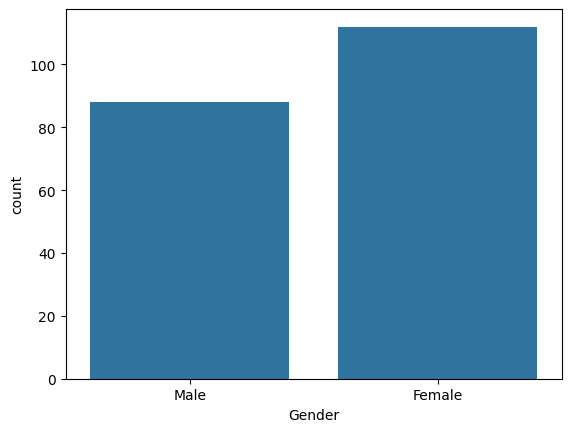

In [18]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

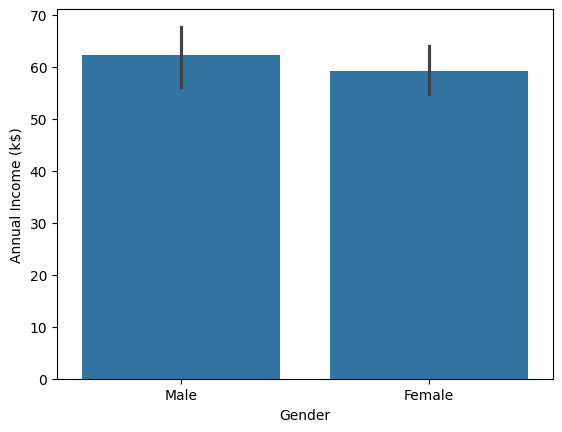

In [19]:
sns.barplot(x= 'Gender',  y = 'Annual Income (k$)', data = df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

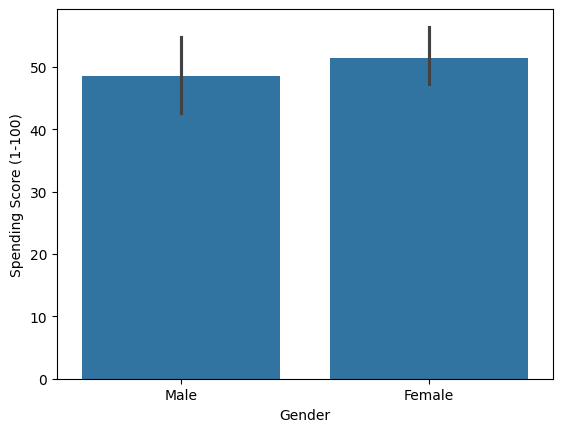

In [20]:
sns.barplot(x= 'Gender',  y = 'Spending Score (1-100)', data = df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

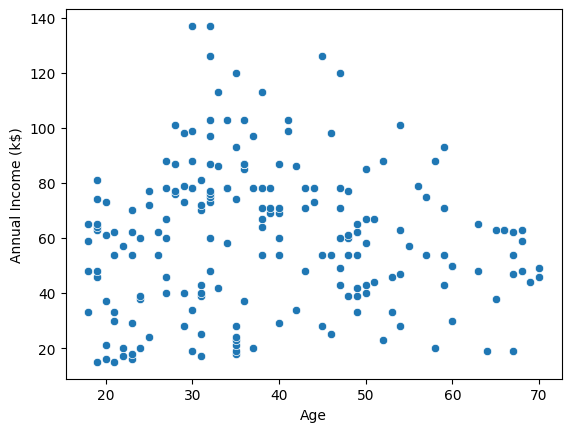

In [21]:
sns.scatterplot(x= 'Age',  y = 'Annual Income (k$)', data = df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

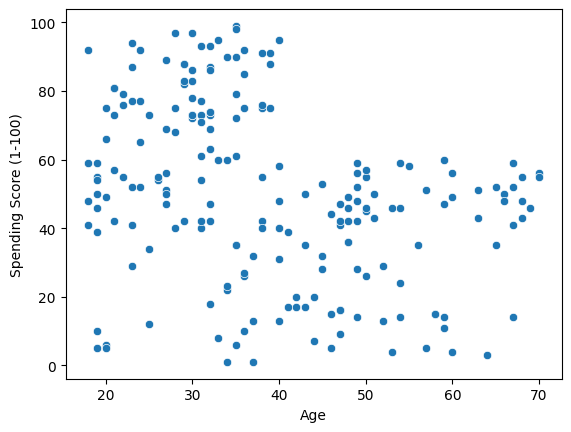

In [22]:
sns.scatterplot(x= 'Age',  y = 'Spending Score (1-100)', data = df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

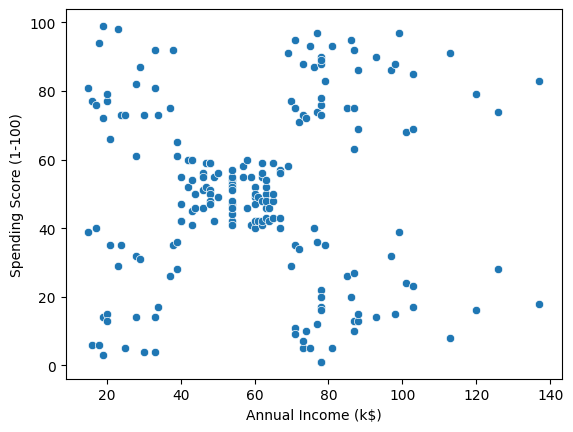

In [23]:
sns.scatterplot(x= 'Annual Income (k$)',  y = 'Spending Score (1-100)', data = df)

## 주요 코드 미리 보기
----

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X= df.iloc[:,3:]
sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters= 2, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

print('실루엣 점수: {0:.4f}'.format(silhouette_score(X, y_preds))) # 0~1 사이의 값

실루엣 점수: 0.3147


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

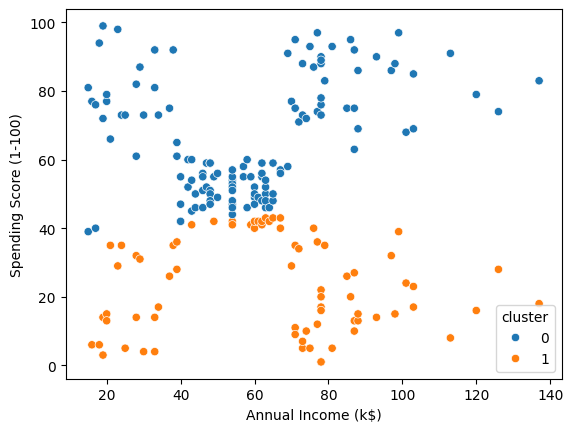

In [25]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'cluster')

## 코드 구현하기
----
   

In [26]:
silhouette_avg = []
for k in range(10):
    model = KMeans(n_clusters= k+2, random_state=42)
    y_preds = model.fit_predict(X)
    score = silhouette_score(X, y_preds)
    silhouette_avg.append(score)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}".format(k+2, score))

군집개수: 2개, 평균 실루엣 점수: 0.3147
군집개수: 3개, 평균 실루엣 점수: 0.4666
군집개수: 4개, 평균 실루엣 점수: 0.4939
군집개수: 5개, 평균 실루엣 점수: 0.5547
군집개수: 6개, 평균 실루엣 점수: 0.5399
군집개수: 7개, 평균 실루엣 점수: 0.5263
군집개수: 8개, 평균 실루엣 점수: 0.4558
군집개수: 9개, 평균 실루엣 점수: 0.4553
군집개수: 10개, 평균 실루엣 점수: 0.4476
군집개수: 11개, 평균 실루엣 점수: 0.4385


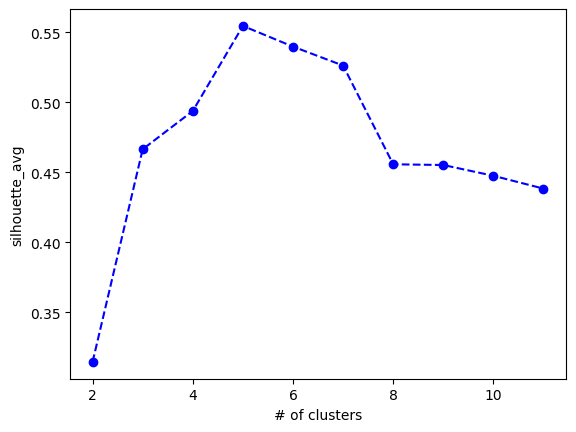

In [27]:
plt.plot(range(2,12), silhouette_avg, 'bo--')
plt.xlabel('# of clusters')
plt.ylabel('silhouette_avg')
plt.show()

In [28]:
model = KMeans(n_clusters= 5, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

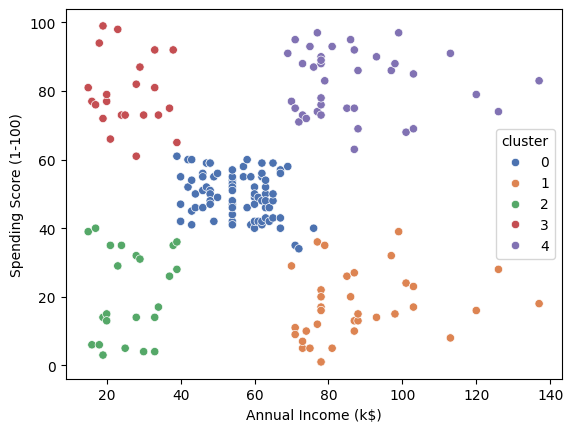

In [29]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'cluster', palette="deep")

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

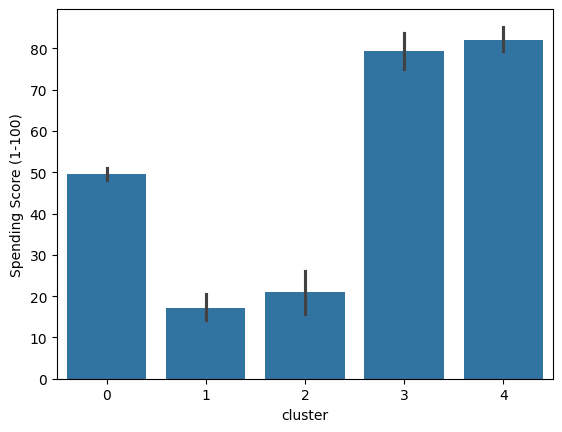

In [30]:
sns.barplot(x = 'cluster', y = 'Spending Score (1-100)', data = df)

<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

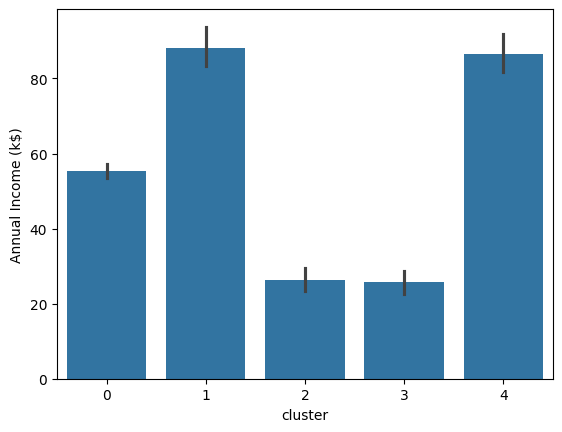

In [31]:
sns.barplot(x = 'cluster', y = 'Annual Income (k$)', data = df)

<Axes: xlabel='cluster', ylabel='count'>

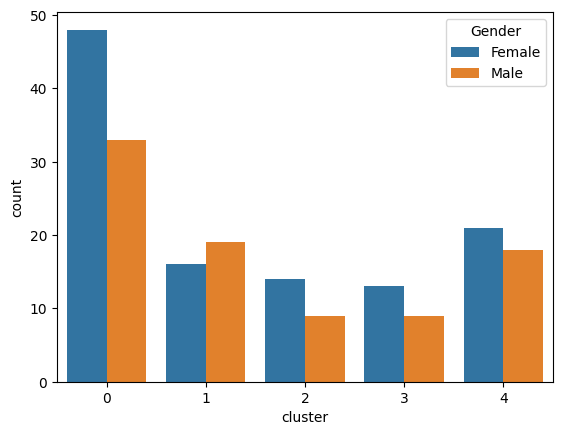

In [32]:
sns.countplot(x='cluster', data = df, hue = 'Gender')

<Axes: xlabel='cluster', ylabel='Age'>

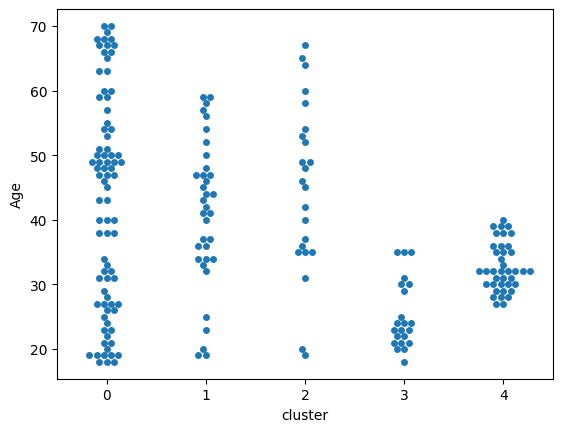

In [33]:
sns.swarmplot(x = 'cluster', y='Age', data = df)